<a href="https://colab.research.google.com/github/Aayush6377/Machine-Learning-Lab-programs-Sem-6/blob/main/Lab_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Write a python script where three datasets are required:**


### 1.   Small Size datasets (400 to 500 datapoints)
### 2.   Intermediate Size datasets (1000 - 2000 datapoints)
### 3.   Large Size datasets (50,000 - 90,000 datapoints)

### Analyse thee data distribution through plots
### Analyse the efficancy of various supervised machine learning algorithm



In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris, load_breast_cancer, fetch_covtype

In [2]:
#Small Dataset: Iris
iris = load_iris()
x_iris = iris.data
y_iris = iris.target

print(f"Iris Dataset Shape: {x_iris.shape}")

Iris Dataset Shape: (150, 4)


In [3]:
#Intermediate Dataset: Breast Cancer
cancer = load_breast_cancer()
x_cancer = cancer.data
y_cancer = cancer.target

print(f"Breast Cancer Dataset Shape: {x_cancer.shape}")

Breast Cancer Dataset Shape: (569, 30)


In [4]:
#Large Dataset: Covertype
covtype = fetch_covtype()
x_cov = covtype.data
y_cov = covtype.target

print(f"Covertype Dataset Shape: {x_cov.shape}")

Covertype Dataset Shape: (581012, 54)


In [5]:
#Define Training & Evaluation Function
def evaluate_model(x,y,dataset_name):
  print("\nEvaluating on: ",dataset_name)

  x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

  scaler=StandardScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  models = {"SVM": SVC(), "KNN": KNeighborsClassifier(), "Logistic Regression": LogisticRegression(max_iter=1000)}

  results=[]
  for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred=model.predict(x_test)

    acc=accuracy_score(y_test,y_pred)
    print(name," accuracy: ",round(acc,3))
    print(classification_report(y_test, y_pred, zero_division=0))
    results.append((dataset_name, name, acc))

  return results

In [6]:
#Apply Models to Iris Dataset (Small)
results_iris = evaluate_model(x_iris, y_iris, "Iris")


Evaluating on:  Iris
SVM  accuracy:  0.967
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

KNN  accuracy:  0.933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Logistic Regression  accuracy:  0.933
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90  

In [7]:
#Apply Models to Breast Cancer Dataset (Intermediate)
results_cancer = evaluate_model(x_cancer, y_cancer, "Breast Cancer")


Evaluating on:  Breast Cancer
SVM  accuracy:  0.982
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

KNN  accuracy:  0.956
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Logistic Regression  accuracy:  0.982
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg   

In [8]:
#Apply Models to Covertype Dataset (Large)
x_cov_sample, _, y_cov_sample, _ = train_test_split(x_cov, y_cov, train_size=20000, stratify=y_cov, random_state=42)
results_cov = evaluate_model(x_cov_sample, y_cov_sample, "Covertype")


Evaluating on:  Covertype
SVM  accuracy:  0.747
              precision    recall  f1-score   support

           1       0.75      0.72      0.74      1458
           2       0.76      0.83      0.79      1951
           3       0.63      0.91      0.74       246
           4       0.33      0.05      0.09        19
           5       0.00      0.00      0.00        65
           6       0.55      0.05      0.09       120
           7       0.79      0.66      0.72       141

    accuracy                           0.75      4000
   macro avg       0.54      0.46      0.45      4000
weighted avg       0.73      0.75      0.73      4000

KNN  accuracy:  0.786
              precision    recall  f1-score   support

           1       0.79      0.77      0.78      1458
           2       0.81      0.85      0.83      1951
           3       0.69      0.79      0.74       246
           4       0.31      0.21      0.25        19
           5       0.57      0.25      0.34        65
       

In [10]:
#Combine results from all datasets
all_results = results_iris + results_cancer + results_cov

df_results = pd.DataFrame(all_results, columns=["Dataset", "Algorithm", "Accuracy"])
print(df_results)

         Dataset            Algorithm  Accuracy
0           Iris                  SVM  0.966667
1           Iris                  KNN  0.933333
2           Iris  Logistic Regression  0.933333
3  Breast Cancer                  SVM  0.982456
4  Breast Cancer                  KNN  0.956140
5  Breast Cancer  Logistic Regression  0.982456
6      Covertype                  SVM  0.746750
7      Covertype                  KNN  0.786000
8      Covertype  Logistic Regression  0.724500


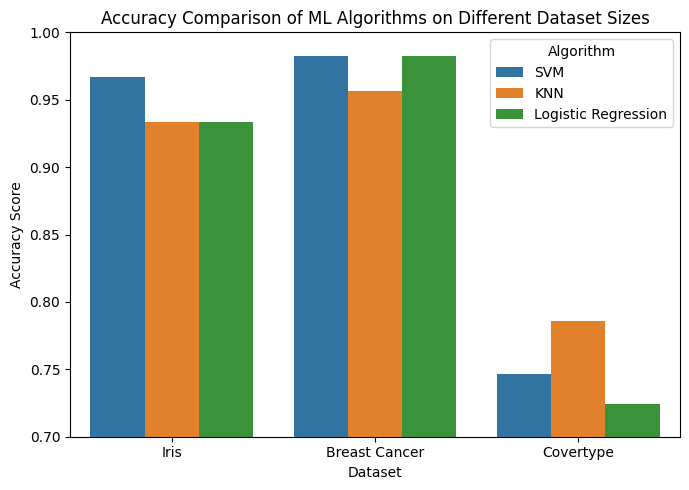

In [12]:
#Plot Comparison
plt.figure(figsize=(7, 5))
sns.barplot(data=df_results, x="Dataset", y="Accuracy", hue="Algorithm")
plt.title("Accuracy Comparison of ML Algorithms on Different Dataset Sizes")
plt.ylabel("Accuracy Score")
plt.ylim(0.7, 1.0)
plt.legend(title="Algorithm")
plt.tight_layout()
plt.show()